In [158]:
import numpy as np
from tqdm import tqdm

In [159]:
class SimpleClassifier:
    
    def __init__(self, layers, alpha=0.1):
        # initialize matrix of weights
        self.W = []
        # number of layers represents actual architecture of the feedforward network
        self.layers = layers
        # learning rate
        self.alpha = alpha
        # insert initial values into the matrix of weights
        for i in np.arange(0, len(layers)-2):
            w = np.random.randn(layers[i]+1, layers[i+1]+1)
            self.W.append(w / np.sqrt(layers[i]))
        # insert initial values for output of the NN
        w = np.random.randn(layers[-2]+1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
        
    def __repr__(self):
        # construct the string to represent the NN architecture
        return f'Neural Network: {"-".join(str(l) for l in layers)}'

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def dsigmoid(self,x):
        return x * (1 - x)

    def fit(self, X,y,epochs=1000, display_update=1):
        # Insert bias into the matrix of features
        X = np.c_[X, np.ones((X.shape[0]))]

        for epoch in tqdm(np.arange(epochs)):

            for x, target in zip(X,y):
                # backpropagation
                self.fit_partial(x, target)

            # Set printing frequency
            if epoch == 0 or (epoch + 1) % display_update == 0:
                loss = self.calculate_loss(X,y)
                print(f'Epoch: {epoch+1}, Loss: {loss}')

    def fit_partial(self, x, y):
        # list of output activations for each layer
        A = [np.atleast_2d(x)]

        # 1. Feedforward step 

        for layer in np.arange(0, len(self.W)):
            # feedforward the net activation of the current layer
            net_input = A[layer].dot(self.W[layer])
            # net output = activation_func (net_input)
            net_output = self.sigmoid(net_input)
            # add net output to the list of activations
            A.append(net_output)

        # 2. Backpropagation step
        # error between true and counted values
        error = A[-1] - y
        # build the chain rule for the output value
        # D = (a(x) - y)*d(sigmoid(a))/dx
        D = [error * self.dsigmoid(A[-1])]

        for layer in np.arange(len(A) - 2, 0, -1):
            # the same for all the rest hidden layers
            delta = D[-1].dot(self.W[layer].T)
            # apply chain rule
            delta = delta * self.dsigmoid(A[layer])
            D.append(delta)
        # Reverse the deltas to make them be in the correct order
        D = D[::-1]

        # 3. Update weights
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self,X,add_bias=True):
        # output prediction as input feature
        p = np.atleast_2d(X)

        if add_bias:
            p = np.c_[p, np.ones((p.shape[0]))]

        for layer in np.arange(0, len(self.W)):

            p = self.sigmoid(np.dot(p, self.W[layer]))

        return p

    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, add_bias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        return loss

In [160]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [161]:
nn = SimpleClassifier([2,3,1], alpha=0.5)
nn.fit(X,y, 20000)

  4%|▎         | 731/20000 [00:00<00:05, 3718.68it/s]

Epoch: 1, Loss: 0.5199614963280826
Epoch: 2, Loss: 0.5146995671405025
Epoch: 3, Loss: 0.5108888350750612
Epoch: 4, Loss: 0.5081548999216696
Epoch: 5, Loss: 0.5062062850845267
Epoch: 6, Loss: 0.5048233911312072
Epoch: 7, Loss: 0.5038444753177482
Epoch: 8, Loss: 0.5031522666908986
Epoch: 9, Loss: 0.5026626636942986
Epoch: 10, Loss: 0.5023158102441346
Epoch: 11, Loss: 0.5020693313599222
Epoch: 12, Loss: 0.5018933380750475
Epoch: 13, Loss: 0.5017668020716103
Epoch: 14, Loss: 0.5016749548952681
Epoch: 15, Loss: 0.5016074369204329
Epoch: 16, Loss: 0.5015569870653618
Epoch: 17, Loss: 0.5015185187411907
Epoch: 18, Loss: 0.5014884698535648
Epoch: 19, Loss: 0.5014643463820375
Epoch: 20, Loss: 0.5014444022711385
Epoch: 21, Loss: 0.5014274151049569
Epoch: 22, Loss: 0.5014125289898701
Epoch: 23, Loss: 0.5013991445490333
Epoch: 24, Loss: 0.5013868419199274
Epoch: 25, Loss: 0.5013753268615604
Epoch: 26, Loss: 0.5013643930392776
Epoch: 27, Loss: 0.501353895632573
Epoch: 28, Loss: 0.5013437328672796
Ep

  7%|▋         | 1439/20000 [00:00<00:05, 3532.20it/s]

Epoch: 732, Loss: 0.4930458617520542
Epoch: 733, Loss: 0.4929551722292471
Epoch: 734, Loss: 0.4928632648690935
Epoch: 735, Loss: 0.492770124658404
Epoch: 736, Loss: 0.49267573645616236
Epoch: 737, Loss: 0.49258008499360995
Epoch: 738, Loss: 0.49248315487433814
Epoch: 739, Loss: 0.49238493057438976
Epoch: 740, Loss: 0.49228539644236835
Epoch: 741, Loss: 0.49218453669955314
Epoch: 742, Loss: 0.4920823354400201
Epoch: 743, Loss: 0.49197877663076783
Epoch: 744, Loss: 0.4918738441118463
Epoch: 745, Loss: 0.4917675215964905
Epoch: 746, Loss: 0.49165979267125315
Epoch: 747, Loss: 0.4915506407961411
Epoch: 748, Loss: 0.4914400493047502
Epoch: 749, Loss: 0.49132800140439964
Epoch: 750, Loss: 0.4912144801762644
Epoch: 751, Loss: 0.4910994685755057
Epoch: 752, Loss: 0.49098294943139686
Epoch: 753, Loss: 0.490864905447446
Epoch: 754, Loss: 0.49074531920151176
Epoch: 755, Loss: 0.49062417314591544
Epoch: 756, Loss: 0.4905014496075445
Epoch: 757, Loss: 0.4903771307879494
Epoch: 758, Loss: 0.49025119

  9%|▉         | 1798/20000 [00:00<00:05, 3546.56it/s]


Epoch: 1487, Loss: 0.18961420851824967
Epoch: 1488, Loss: 0.18943307912298626
Epoch: 1489, Loss: 0.18925252494076042
Epoch: 1490, Loss: 0.18907254433921178
Epoch: 1491, Loss: 0.18889313568484467
Epoch: 1492, Loss: 0.18871429734307582
Epoch: 1493, Loss: 0.18853602767828326
Epoch: 1494, Loss: 0.18835832505385325
Epoch: 1495, Loss: 0.18818118783222737
Epoch: 1496, Loss: 0.18800461437494942
Epoch: 1497, Loss: 0.18782860304271143
Epoch: 1498, Loss: 0.18765315219539908
Epoch: 1499, Loss: 0.1874782601921369
Epoch: 1500, Loss: 0.1873039253913329
Epoch: 1501, Loss: 0.18713014615072276
Epoch: 1502, Loss: 0.18695692082741328
Epoch: 1503, Loss: 0.18678424777792557
Epoch: 1504, Loss: 0.18661212535823782
Epoch: 1505, Loss: 0.18644055192382722
Epoch: 1506, Loss: 0.18626952582971168
Epoch: 1507, Loss: 0.18609904543049102
Epoch: 1508, Loss: 0.18592910908038748
Epoch: 1509, Loss: 0.1857597151332857
Epoch: 1510, Loss: 0.18559086194277272
Epoch: 1511, Loss: 0.185422547862177
Epoch: 1512, Loss: 0.18525477

 15%|█▍        | 2913/20000 [00:00<00:04, 3538.40it/s]


Epoch: 2195, Loss: 0.02749054556457689
Epoch: 2196, Loss: 0.02741455951199273
Epoch: 2197, Loss: 0.027339021326019827
Epoch: 2198, Loss: 0.027263926049268205
Epoch: 2199, Loss: 0.027189268813800134
Epoch: 2200, Loss: 0.027115044838932283
Epoch: 2201, Loss: 0.027041249429102236
Epoch: 2202, Loss: 0.026967877971798337
Epoch: 2203, Loss: 0.026894925935549496
Epoch: 2204, Loss: 0.026822388867974094
Epoch: 2205, Loss: 0.026750262393885428
Epoch: 2206, Loss: 0.026678542213452026
Epoch: 2207, Loss: 0.02660722410041111
Epoch: 2208, Loss: 0.02653630390033343
Epoch: 2209, Loss: 0.026465777528937542
Epoch: 2210, Loss: 0.02639564097045275
Epoch: 2211, Loss: 0.026325890276027886
Epoch: 2212, Loss: 0.026256521562185685
Epoch: 2213, Loss: 0.026187531009320503
Epoch: 2214, Loss: 0.026118914860238374
Epoch: 2215, Loss: 0.026050669418737897
Epoch: 2216, Loss: 0.025982791048230508
Epoch: 2217, Loss: 0.0259152761703995
Epoch: 2218, Loss: 0.0258481212638957
Epoch: 2219, Loss: 0.0257813228630693
Epoch: 222

 18%|█▊        | 3675/20000 [00:01<00:04, 3624.03it/s]

Epoch: 2935, Loss: 0.008585418423101062
Epoch: 2936, Loss: 0.008576817709607098
Epoch: 2937, Loss: 0.008568232915231885
Epoch: 2938, Loss: 0.008559663997570717
Epoch: 2939, Loss: 0.008551110914365678
Epoch: 2940, Loss: 0.008542573623504988
Epoch: 2941, Loss: 0.008534052083022405
Epoch: 2942, Loss: 0.008525546251096632
Epoch: 2943, Loss: 0.00851705608605061
Epoch: 2944, Loss: 0.008508581546351012
Epoch: 2945, Loss: 0.008500122590607548
Epoch: 2946, Loss: 0.008491679177572407
Epoch: 2947, Loss: 0.008483251266139635
Epoch: 2948, Loss: 0.008474838815344537
Epoch: 2949, Loss: 0.008466441784363097
Epoch: 2950, Loss: 0.008458060132511344
Epoch: 2951, Loss: 0.008449693819244779
Epoch: 2952, Loss: 0.008441342804157807
Epoch: 2953, Loss: 0.008433007046983163
Epoch: 2954, Loss: 0.008424686507591235
Epoch: 2955, Loss: 0.008416381145989594
Epoch: 2956, Loss: 0.008408090922322333
Epoch: 2957, Loss: 0.00839981579686962
Epoch: 2958, Loss: 0.008391555730046926
Epoch: 2959, Loss: 0.008383310682404645
Ep

 22%|██▏       | 4381/20000 [00:01<00:04, 3458.81it/s]


Epoch: 3684, Loss: 0.004810959082196723
Epoch: 3685, Loss: 0.004808040575635466
Epoch: 3686, Loss: 0.004805125400083859
Epoch: 3687, Loss: 0.0048022135500105706
Epoch: 3688, Loss: 0.004799305019896248
Epoch: 3689, Loss: 0.004796399804233493
Epoch: 3690, Loss: 0.00479349789752687
Epoch: 3691, Loss: 0.004790599294292808
Epoch: 3692, Loss: 0.0047877039890596405
Epoch: 3693, Loss: 0.004784811976367485
Epoch: 3694, Loss: 0.004781923250768308
Epoch: 3695, Loss: 0.004779037806825803
Epoch: 3696, Loss: 0.004776155639115463
Epoch: 3697, Loss: 0.00477327674222445
Epoch: 3698, Loss: 0.004770401110751613
Epoch: 3699, Loss: 0.004767528739307445
Epoch: 3700, Loss: 0.0047646596225140725
Epoch: 3701, Loss: 0.004761793755005194
Epoch: 3702, Loss: 0.004758931131426055
Epoch: 3703, Loss: 0.004756071746433431
Epoch: 3704, Loss: 0.004753215594695613
Epoch: 3705, Loss: 0.004750362670892338
Epoch: 3706, Loss: 0.004747512969714775
Epoch: 3707, Loss: 0.004744666485865478
Epoch: 3708, Loss: 0.00474182321405842

 26%|██▌       | 5111/20000 [00:01<00:04, 3561.92it/s]


Epoch: 4431, Loss: 0.0032866320043638056
Epoch: 4432, Loss: 0.003285211502255115
Epoch: 4433, Loss: 0.0032837921643063487
Epoch: 4434, Loss: 0.0032823739891207123
Epoch: 4435, Loss: 0.0032809569753036267
Epoch: 4436, Loss: 0.003279541121462692
Epoch: 4437, Loss: 0.00327812642620773
Epoch: 4438, Loss: 0.0032767128881507016
Epoch: 4439, Loss: 0.0032753005059057904
Epoch: 4440, Loss: 0.003273889278089326
Epoch: 4441, Loss: 0.0032724792033198566
Epoch: 4442, Loss: 0.0032710702802180233
Epoch: 4443, Loss: 0.0032696625074066874
Epoch: 4444, Loss: 0.0032682558835108767
Epoch: 4445, Loss: 0.0032668504071577463
Epoch: 4446, Loss: 0.0032654460769766074
Epoch: 4447, Loss: 0.0032640428915989258
Epoch: 4448, Loss: 0.0032626408496583188
Epoch: 4449, Loss: 0.003261239949790535
Epoch: 4450, Loss: 0.0032598401906334417
Epoch: 4451, Loss: 0.003258441570827067
Epoch: 4452, Loss: 0.0032570440890135285
Epoch: 4453, Loss: 0.0032556477438371338
Epoch: 4454, Loss: 0.0032542525339442213
Epoch: 4455, Loss: 0.0

 29%|██▉       | 5820/20000 [00:01<00:04, 3453.45it/s]


Epoch: 5175, Loss: 0.0024776694407780183
Epoch: 5176, Loss: 0.002476839074100277
Epoch: 5177, Loss: 0.0024760092370243484
Epoch: 5178, Loss: 0.002475179929053953
Epoch: 5179, Loss: 0.002474351149693418
Epoch: 5180, Loss: 0.002473522898447664
Epoch: 5181, Loss: 0.002472695174822243
Epoch: 5182, Loss: 0.0024718679783233056
Epoch: 5183, Loss: 0.002471041308457606
Epoch: 5184, Loss: 0.0024702151647325223
Epoch: 5185, Loss: 0.00246938954665601
Epoch: 5186, Loss: 0.0024685644537366658
Epoch: 5187, Loss: 0.0024677398854836595
Epoch: 5188, Loss: 0.002466915841406782
Epoch: 5189, Loss: 0.002466092321016423
Epoch: 5190, Loss: 0.002465269323823578
Epoch: 5191, Loss: 0.002464446849339814
Epoch: 5192, Loss: 0.002463624897077352
Epoch: 5193, Loss: 0.0024628034665489505
Epoch: 5194, Loss: 0.0024619825572680244
Epoch: 5195, Loss: 0.002461162168748536
Epoch: 5196, Loss: 0.0024603423005050726
Epoch: 5197, Loss: 0.0024595229520528216
Epoch: 5198, Loss: 0.0024587041229075235
Epoch: 5199, Loss: 0.00245788

 33%|███▎      | 6577/20000 [00:01<00:03, 3611.85it/s]

Epoch: 5909, Loss: 0.0019840727493698595
Epoch: 5910, Loss: 0.0019835289236692618
Epoch: 5911, Loss: 0.001982985382106678
Epoch: 5912, Loss: 0.0019824421244634726
Epoch: 5913, Loss: 0.001981899150521264
Epoch: 5914, Loss: 0.001981356460061874
Epoch: 5915, Loss: 0.0019808140528673663
Epoch: 5916, Loss: 0.001980271928720011
Epoch: 5917, Loss: 0.0019797300874022845
Epoch: 5918, Loss: 0.0019791885286969085
Epoch: 5919, Loss: 0.001978647252386803
Epoch: 5920, Loss: 0.0019781062582551363
Epoch: 5921, Loss: 0.0019775655460852653
Epoch: 5922, Loss: 0.001977025115660795
Epoch: 5923, Loss: 0.0019764849667655115
Epoch: 5924, Loss: 0.001975945099183454
Epoch: 5925, Loss: 0.00197540551269887
Epoch: 5926, Loss: 0.0019748662070962174
Epoch: 5927, Loss: 0.00197432718216018
Epoch: 5928, Loss: 0.0019737884376756607
Epoch: 5929, Loss: 0.0019732499734277605
Epoch: 5930, Loss: 0.001972711789201837
Epoch: 5931, Loss: 0.0019721738847834043
Epoch: 5932, Loss: 0.001971636259958262
Epoch: 5933, Loss: 0.00197109

 36%|███▋      | 7296/20000 [00:02<00:03, 3371.56it/s]

Epoch: 6662, Loss: 0.001642003151434894
Epoch: 6663, Loss: 0.0016416240757277985
Epoch: 6664, Loss: 0.0016412451669437864
Epoch: 6665, Loss: 0.0016408664249744633
Epoch: 6666, Loss: 0.0016404878497115034
Epoch: 6667, Loss: 0.0016401094410466903
Epoch: 6668, Loss: 0.0016397311988718968
Epoch: 6669, Loss: 0.0016393531230790952
Epoch: 6670, Loss: 0.0016389752135603265
Epoch: 6671, Loss: 0.0016385974702077632
Epoch: 6672, Loss: 0.0016382198929136285
Epoch: 6673, Loss: 0.001637842481570272
Epoch: 6674, Loss: 0.0016374652360701056
Epoch: 6675, Loss: 0.0016370881563056608
Epoch: 6676, Loss: 0.0016367112421695397
Epoch: 6677, Loss: 0.0016363344935544548
Epoch: 6678, Loss: 0.001635957910353186
Epoch: 6679, Loss: 0.0016355814924586302
Epoch: 6680, Loss: 0.0016352052397637607
Epoch: 6681, Loss: 0.0016348291521616446
Epoch: 6682, Loss: 0.0016344532295454453
Epoch: 6683, Loss: 0.0016340774718084147
Epoch: 6684, Loss: 0.0016337018788438946
Epoch: 6685, Loss: 0.001633326450545308
Epoch: 6686, Loss: 0

 40%|████      | 8019/20000 [00:02<00:03, 3477.93it/s]


Epoch: 7328, Loss: 0.001421851136165819
Epoch: 7329, Loss: 0.0014215630917016387
Epoch: 7330, Loss: 0.0014212751585423746
Epoch: 7331, Loss: 0.0014209873366245254
Epoch: 7332, Loss: 0.00142069962588464
Epoch: 7333, Loss: 0.0014204120262593352
Epoch: 7334, Loss: 0.0014201245376852516
Epoch: 7335, Loss: 0.0014198371600990917
Epoch: 7336, Loss: 0.0014195498934375956
Epoch: 7337, Loss: 0.0014192627376375623
Epoch: 7338, Loss: 0.0014189756926358342
Epoch: 7339, Loss: 0.0014186887583692983
Epoch: 7340, Loss: 0.0014184019347748885
Epoch: 7341, Loss: 0.0014181152217895886
Epoch: 7342, Loss: 0.0014178286193504246
Epoch: 7343, Loss: 0.0014175421273944807
Epoch: 7344, Loss: 0.0014172557458588873
Epoch: 7345, Loss: 0.0014169694746808035
Epoch: 7346, Loss: 0.0014166833137974632
Epoch: 7347, Loss: 0.001416397263146128
Epoch: 7348, Loss: 0.0014161113226641006
Epoch: 7349, Loss: 0.0014158254922887617
Epoch: 7350, Loss: 0.0014155397719575011
Epoch: 7351, Loss: 0.0014152541616077904
Epoch: 7352, Loss: 

 44%|████▎     | 8743/20000 [00:02<00:03, 3424.22it/s]


Epoch: 8088, Loss: 0.0012309907413080856
Epoch: 8089, Loss: 0.0012307719339134462
Epoch: 8090, Loss: 0.0012305532006788855
Epoch: 8091, Loss: 0.0012303345415672663
Epoch: 8092, Loss: 0.0012301159565414848
Epoch: 8093, Loss: 0.001229897445564454
Epoch: 8094, Loss: 0.0012296790085991136
Epoch: 8095, Loss: 0.0012294606456084213
Epoch: 8096, Loss: 0.0012292423565553772
Epoch: 8097, Loss: 0.0012290241414029878
Epoch: 8098, Loss: 0.0012288060001142897
Epoch: 8099, Loss: 0.0012285879326523546
Epoch: 8100, Loss: 0.0012283699389802607
Epoch: 8101, Loss: 0.0012281520190611283
Epoch: 8102, Loss: 0.0012279341728580794
Epoch: 8103, Loss: 0.0012277164003342853
Epoch: 8104, Loss: 0.0012274987014529281
Epoch: 8105, Loss: 0.0012272810761772127
Epoch: 8106, Loss: 0.0012270635244703756
Epoch: 8107, Loss: 0.001226846046295669
Epoch: 8108, Loss: 0.0012266286416163822
Epoch: 8109, Loss: 0.0012264113103958143
Epoch: 8110, Loss: 0.0012261940525972988
Epoch: 8111, Loss: 0.0012259768681841896
Epoch: 8112, Loss

 46%|████▌     | 9151/20000 [00:02<00:03, 3465.66it/s]


Epoch: 8784, Loss: 0.0010947733480209066
Epoch: 8785, Loss: 0.001094598377379099
Epoch: 8786, Loss: 0.0010944234600309068
Epoch: 8787, Loss: 0.0010942485959523302
Epoch: 8788, Loss: 0.0010940737851194014
Epoch: 8789, Loss: 0.0010938990275081463
Epoch: 8790, Loss: 0.0010937243230946193
Epoch: 8791, Loss: 0.0010935496718548813
Epoch: 8792, Loss: 0.001093375073765015
Epoch: 8793, Loss: 0.0010932005288011128
Epoch: 8794, Loss: 0.001093026036939274
Epoch: 8795, Loss: 0.0010928515981556322
Epoch: 8796, Loss: 0.0010926772124263081
Epoch: 8797, Loss: 0.0010925028797274543
Epoch: 8798, Loss: 0.0010923286000352431
Epoch: 8799, Loss: 0.0010921543733258478
Epoch: 8800, Loss: 0.0010919801995754588
Epoch: 8801, Loss: 0.001091806078760281
Epoch: 8802, Loss: 0.00109163201085653
Epoch: 8803, Loss: 0.0010914579958404523
Epoch: 8804, Loss: 0.0010912840336882888
Epoch: 8805, Loss: 0.0010911101243762998
Epoch: 8806, Loss: 0.0010909362678807619
Epoch: 8807, Loss: 0.0010907624641779746
Epoch: 8808, Loss: 0.

 49%|████▉     | 9894/20000 [00:02<00:02, 3590.03it/s]

Epoch: 9498, Loss: 0.0009820990409522934
Epoch: 9499, Loss: 0.0009819567767318494
Epoch: 9500, Loss: 0.0009818145517583887
Epoch: 9501, Loss: 0.0009816723660159036
Epoch: 9502, Loss: 0.000981530219488389
Epoch: 9503, Loss: 0.0009813881121598653
Epoch: 9504, Loss: 0.000981246044014332
Epoch: 9505, Loss: 0.0009811040150358298
Epoch: 9506, Loss: 0.0009809620252083872
Epoch: 9507, Loss: 0.0009808200745160373
Epoch: 9508, Loss: 0.000980678162942844
Epoch: 9509, Loss: 0.0009805362904728673
Epoch: 9510, Loss: 0.0009803944570901636
Epoch: 9511, Loss: 0.0009802526627788223
Epoch: 9512, Loss: 0.0009801109075229172
Epoch: 9513, Loss: 0.000979969191306555
Epoch: 9514, Loss: 0.000979827514113833
Epoch: 9515, Loss: 0.0009796858759288539
Epoch: 9516, Loss: 0.0009795442767357508
Epoch: 9517, Loss: 0.0009794027165186418
Epoch: 9518, Loss: 0.0009792611952616644
Epoch: 9519, Loss: 0.000979119712948972
Epoch: 9520, Loss: 0.0009789782695647147
Epoch: 9521, Loss: 0.000978836865093053
Epoch: 9522, Loss: 0.00

 53%|█████▎    | 10642/20000 [00:03<00:02, 3575.16it/s]


Epoch: 10211, Loss: 0.0008897477805573193
Epoch: 10212, Loss: 0.000889629899924984
Epoch: 10213, Loss: 0.0008895120490127509
Epoch: 10214, Loss: 0.0008893942278095429
Epoch: 10215, Loss: 0.0008892764363042788
Epoch: 10216, Loss: 0.0008891586744858915
Epoch: 10217, Loss: 0.0008890409423433093
Epoch: 10218, Loss: 0.0008889232398654705
Epoch: 10219, Loss: 0.0008888055670413278
Epoch: 10220, Loss: 0.0008886879238598306
Epoch: 10221, Loss: 0.0008885703103099295
Epoch: 10222, Loss: 0.0008884527263805929
Epoch: 10223, Loss: 0.0008883351720607869
Epoch: 10224, Loss: 0.0008882176473394776
Epoch: 10225, Loss: 0.0008881001522056586
Epoch: 10226, Loss: 0.0008879826866482917
Epoch: 10227, Loss: 0.0008878652506563786
Epoch: 10228, Loss: 0.0008877478442189165
Epoch: 10229, Loss: 0.000887630467324898
Epoch: 10230, Loss: 0.0008875131199633321
Epoch: 10231, Loss: 0.000887395802123231
Epoch: 10232, Loss: 0.0008872785137936019
Epoch: 10233, Loss: 0.0008871612549634738
Epoch: 10234, Loss: 0.00088704402562

 57%|█████▋    | 11421/20000 [00:03<00:02, 3604.91it/s]


Epoch: 11024, Loss: 0.0008028217948704659
Epoch: 11025, Loss: 0.0008027248524895131
Epoch: 11026, Loss: 0.0008026279323634698
Epoch: 11027, Loss: 0.0008025310344847714
Epoch: 11028, Loss: 0.0008024341588458725
Epoch: 11029, Loss: 0.0008023373054392199
Epoch: 11030, Loss: 0.0008022404742572721
Epoch: 11031, Loss: 0.0008021436652924769
Epoch: 11032, Loss: 0.0008020468785372948
Epoch: 11033, Loss: 0.0008019501139841981
Epoch: 11034, Loss: 0.0008018533716256436
Epoch: 11035, Loss: 0.0008017566514541014
Epoch: 11036, Loss: 0.0008016599534620536
Epoch: 11037, Loss: 0.0008015632776419673
Epoch: 11038, Loss: 0.0008014666239863231
Epoch: 11039, Loss: 0.0008013699924876098
Epoch: 11040, Loss: 0.000801273383138317
Epoch: 11041, Loss: 0.0008011767959309191
Epoch: 11042, Loss: 0.0008010802308579268
Epoch: 11043, Loss: 0.0008009836879118327
Epoch: 11044, Loss: 0.0008008871670851275
Epoch: 11045, Loss: 0.0008007906683703259
Epoch: 11046, Loss: 0.0008006941917599315
Epoch: 11047, Loss: 0.000800597737

 61%|██████    | 12146/20000 [00:03<00:02, 3517.36it/s]


Epoch: 11750, Loss: 0.0007378546567381691
Epoch: 11751, Loss: 0.0007377720783882057
Epoch: 11752, Loss: 0.0007376895175929671
Epoch: 11753, Loss: 0.0007376069743469243
Epoch: 11754, Loss: 0.0007375244486445584
Epoch: 11755, Loss: 0.0007374419404803526
Epoch: 11756, Loss: 0.0007373594498488007
Epoch: 11757, Loss: 0.0007372769767443829
Epoch: 11758, Loss: 0.0007371945211615981
Epoch: 11759, Loss: 0.0007371120830949306
Epoch: 11760, Loss: 0.0007370296625388868
Epoch: 11761, Loss: 0.0007369472594879536
Epoch: 11762, Loss: 0.0007368648739366399
Epoch: 11763, Loss: 0.0007367825058794457
Epoch: 11764, Loss: 0.0007367001553108726
Epoch: 11765, Loss: 0.000736617822225429
Epoch: 11766, Loss: 0.0007365355066176215
Epoch: 11767, Loss: 0.00073645320848197
Epoch: 11768, Loss: 0.0007363709278129793
Epoch: 11769, Loss: 0.0007362886646051752
Epoch: 11770, Loss: 0.0007362064188530663
Epoch: 11771, Loss: 0.0007361241905511761
Epoch: 11772, Loss: 0.0007360419796940295
Epoch: 11773, Loss: 0.00073595978627

 65%|██████▍   | 12903/20000 [00:03<00:02, 3486.88it/s]


Epoch: 12492, Loss: 0.0006810599004169277
Epoch: 12493, Loss: 0.0006809889722068675
Epoch: 12494, Loss: 0.0006809180580147481
Epoch: 12495, Loss: 0.0006808471578364764
Epoch: 12496, Loss: 0.0006807762716679465
Epoch: 12497, Loss: 0.0006807053995050708
Epoch: 12498, Loss: 0.0006806345413437535
Epoch: 12499, Loss: 0.0006805636971799033
Epoch: 12500, Loss: 0.0006804928670094226
Epoch: 12501, Loss: 0.0006804220508282371
Epoch: 12502, Loss: 0.0006803512486322459
Epoch: 12503, Loss: 0.0006802804604173667
Epoch: 12504, Loss: 0.0006802096861795181
Epoch: 12505, Loss: 0.00068013892591462
Epoch: 12506, Loss: 0.0006800681796185857
Epoch: 12507, Loss: 0.0006799974472873384
Epoch: 12508, Loss: 0.0006799267289167988
Epoch: 12509, Loss: 0.0006798560245028945
Epoch: 12510, Loss: 0.0006797853340415451
Epoch: 12511, Loss: 0.0006797146575286837
Epoch: 12512, Loss: 0.0006796439949602337
Epoch: 12513, Loss: 0.0006795733463321234
Epoch: 12514, Loss: 0.0006795027116402941
Epoch: 12515, Loss: 0.0006794320908

 68%|██████▊   | 13639/20000 [00:03<00:01, 3518.65it/s]


Epoch: 13195, Loss: 0.0006344350317283652
Epoch: 13196, Loss: 0.000634373031184526
Epoch: 13197, Loss: 0.0006343110421289447
Epoch: 13198, Loss: 0.0006342490645584684
Epoch: 13199, Loss: 0.0006341870984699542
Epoch: 13200, Loss: 0.0006341251438602574
Epoch: 13201, Loss: 0.0006340632007262241
Epoch: 13202, Loss: 0.0006340012690647185
Epoch: 13203, Loss: 0.0006339393488725917
Epoch: 13204, Loss: 0.0006338774401467076
Epoch: 13205, Loss: 0.0006338155428839174
Epoch: 13206, Loss: 0.000633753657081083
Epoch: 13207, Loss: 0.0006336917827350732
Epoch: 13208, Loss: 0.0006336299198427431
Epoch: 13209, Loss: 0.0006335680684009594
Epoch: 13210, Loss: 0.000633506228406586
Epoch: 13211, Loss: 0.0006334443998564912
Epoch: 13212, Loss: 0.0006333825827475369
Epoch: 13213, Loss: 0.0006333207770765964
Epoch: 13214, Loss: 0.0006332589828405364
Epoch: 13215, Loss: 0.0006331972000362225
Epoch: 13216, Loss: 0.0006331354286605393
Epoch: 13217, Loss: 0.000633073668710346
Epoch: 13218, Loss: 0.000633011920182

 72%|███████▏  | 14407/20000 [00:04<00:01, 3658.61it/s]


Epoch: 13946, Loss: 0.0005909006731654369
Epoch: 13947, Loss: 0.0005908464875710184
Epoch: 13948, Loss: 0.0005907923113889522
Epoch: 13949, Loss: 0.0005907381446168143
Epoch: 13950, Loss: 0.0005906839872521956
Epoch: 13951, Loss: 0.0005906298392926751
Epoch: 13952, Loss: 0.0005905757007358411
Epoch: 13953, Loss: 0.0005905215715792742
Epoch: 13954, Loss: 0.0005904674518205626
Epoch: 13955, Loss: 0.0005904133414572909
Epoch: 13956, Loss: 0.0005903592404870453
Epoch: 13957, Loss: 0.0005903051489074135
Epoch: 13958, Loss: 0.0005902510667159921
Epoch: 13959, Loss: 0.0005901969939103616
Epoch: 13960, Loss: 0.0005901429304881194
Epoch: 13961, Loss: 0.0005900888764468531
Epoch: 13962, Loss: 0.0005900348317841532
Epoch: 13963, Loss: 0.0005899807964976215
Epoch: 13964, Loss: 0.0005899267705848371
Epoch: 13965, Loss: 0.000589872754043411
Epoch: 13966, Loss: 0.0005898187468709273
Epoch: 13967, Loss: 0.000589764749064988
Epoch: 13968, Loss: 0.0005897107606231908
Epoch: 13969, Loss: 0.0005896567815

 76%|███████▌  | 15136/20000 [00:04<00:01, 3542.71it/s]


Epoch: 14723, Loss: 0.0005514593543676559
Epoch: 14724, Loss: 0.0005514118122973825
Epoch: 14725, Loss: 0.0005513642779837422
Epoch: 14726, Loss: 0.000551316751424863
Epoch: 14727, Loss: 0.0005512692326188768
Epoch: 14728, Loss: 0.0005512217215639072
Epoch: 14729, Loss: 0.0005511742182580918
Epoch: 14730, Loss: 0.0005511267226995521
Epoch: 14731, Loss: 0.0005510792348864245
Epoch: 14732, Loss: 0.0005510317548168425
Epoch: 14733, Loss: 0.0005509842824889352
Epoch: 14734, Loss: 0.0005509368179008351
Epoch: 14735, Loss: 0.0005508893610506791
Epoch: 14736, Loss: 0.0005508419119366016
Epoch: 14737, Loss: 0.0005507944705567332
Epoch: 14738, Loss: 0.000550747036909216
Epoch: 14739, Loss: 0.0005506996109921744
Epoch: 14740, Loss: 0.0005506521928037602
Epoch: 14741, Loss: 0.0005506047823421031
Epoch: 14742, Loss: 0.0005505573796053338
Epoch: 14743, Loss: 0.0005505099845916038
Epoch: 14744, Loss: 0.000550462597299045
Epoch: 14745, Loss: 0.0005504152177258001
Epoch: 14746, Loss: 0.00055036784587

 79%|███████▉  | 15889/20000 [00:04<00:01, 3486.33it/s]


Epoch: 15496, Loss: 0.0005168885340795838
Epoch: 15497, Loss: 0.0005168464720047238
Epoch: 15498, Loss: 0.000516804416401436
Epoch: 15499, Loss: 0.0005167623672682484
Epoch: 15500, Loss: 0.0005167203246036901
Epoch: 15501, Loss: 0.000516678288406291
Epoch: 15502, Loss: 0.0005166362586745794
Epoch: 15503, Loss: 0.0005165942354070811
Epoch: 15504, Loss: 0.0005165522186023294
Epoch: 15505, Loss: 0.0005165102082588563
Epoch: 15506, Loss: 0.0005164682043751841
Epoch: 15507, Loss: 0.0005164262069498522
Epoch: 15508, Loss: 0.0005163842159813924
Epoch: 15509, Loss: 0.0005163422314683314
Epoch: 15510, Loss: 0.000516300253409206
Epoch: 15511, Loss: 0.0005162582818025437
Epoch: 15512, Loss: 0.0005162163166468835
Epoch: 15513, Loss: 0.0005161743579407559
Epoch: 15514, Loss: 0.0005161324056826956
Epoch: 15515, Loss: 0.0005160904598712363
Epoch: 15516, Loss: 0.0005160485205049194
Epoch: 15517, Loss: 0.0005160065875822734
Epoch: 15518, Loss: 0.0005159646611018334
Epoch: 15519, Loss: 0.00051592274106

 83%|████████▎ | 16592/20000 [00:04<00:01, 3393.65it/s]


Epoch: 16203, Loss: 0.0004886837562967938
Epoch: 16204, Loss: 0.0004886459265493071
Epoch: 16205, Loss: 0.0004886081023340614
Epoch: 16206, Loss: 0.0004885702836498688
Epoch: 16207, Loss: 0.0004885324704955233
Epoch: 16208, Loss: 0.0004884946628698368
Epoch: 16209, Loss: 0.0004884568607716102
Epoch: 16210, Loss: 0.0004884190641996513
Epoch: 16211, Loss: 0.0004883812731527622
Epoch: 16212, Loss: 0.0004883434876297503
Epoch: 16213, Loss: 0.0004883057076294241
Epoch: 16214, Loss: 0.000488267933150586
Epoch: 16215, Loss: 0.00048823016419204595
Epoch: 16216, Loss: 0.0004881924007526092
Epoch: 16217, Loss: 0.0004881546428310842
Epoch: 16218, Loss: 0.000488116890426276
Epoch: 16219, Loss: 0.0004880791435369975
Epoch: 16220, Loss: 0.000488041402162059
Epoch: 16221, Loss: 0.0004880036663002564
Epoch: 16222, Loss: 0.0004879659359504126
Epoch: 16223, Loss: 0.00048792821111133435
Epoch: 16224, Loss: 0.00048789049178182673
Epoch: 16225, Loss: 0.00048785277796070464
Epoch: 16226, Loss: 0.0004878150

 88%|████████▊ | 17660/20000 [00:05<00:00, 3457.40it/s]


Epoch: 16906, Loss: 0.00046338886074262075
Epoch: 16907, Loss: 0.0004633546435743622
Epoch: 16908, Loss: 0.00046332043117537056
Epoch: 16909, Loss: 0.00046328622354466085
Epoch: 16910, Loss: 0.0004632520206812572
Epoch: 16911, Loss: 0.0004632178225841734
Epoch: 16912, Loss: 0.00046318362925242554
Epoch: 16913, Loss: 0.0004631494406850365
Epoch: 16914, Loss: 0.0004631152568810189
Epoch: 16915, Loss: 0.00046308107783939883
Epoch: 16916, Loss: 0.00046304690355918965
Epoch: 16917, Loss: 0.0004630127340394163
Epoch: 16918, Loss: 0.0004629785692790915
Epoch: 16919, Loss: 0.00046294440927724384
Epoch: 16920, Loss: 0.0004629102540328864
Epoch: 16921, Loss: 0.0004628761035450402
Epoch: 16922, Loss: 0.00046284195781272634
Epoch: 16923, Loss: 0.00046280781683496965
Epoch: 16924, Loss: 0.00046277368061078484
Epoch: 16925, Loss: 0.00046273954913919754
Epoch: 16926, Loss: 0.0004627054224192362
Epoch: 16927, Loss: 0.0004626713004499144
Epoch: 16928, Loss: 0.00046263718323024793
Epoch: 16929, Loss: 0

 92%|█████████▏| 18394/20000 [00:05<00:00, 3485.89it/s]


Epoch: 17689, Loss: 0.0004379825749573215
Epoch: 17690, Loss: 0.00043795181129751307
Epoch: 17691, Loss: 0.0004379210517128654
Epoch: 17692, Loss: 0.00043789029620258397
Epoch: 17693, Loss: 0.00043785954476586726
Epoch: 17694, Loss: 0.0004378287974019151
Epoch: 17695, Loss: 0.00043779805410993787
Epoch: 17696, Loss: 0.00043776731488913244
Epoch: 17697, Loss: 0.0004377365797387018
Epoch: 17698, Loss: 0.00043770584865785535
Epoch: 17699, Loss: 0.00043767512164579446
Epoch: 17700, Loss: 0.0004376443987017136
Epoch: 17701, Loss: 0.0004376136798248303
Epoch: 17702, Loss: 0.0004375829650143373
Epoch: 17703, Loss: 0.0004375522542694477
Epoch: 17704, Loss: 0.00043752154758936156
Epoch: 17705, Loss: 0.00043749084497328325
Epoch: 17706, Loss: 0.00043746014642042096
Epoch: 17707, Loss: 0.00043742945192997947
Epoch: 17708, Loss: 0.0004373987615011591
Epoch: 17709, Loss: 0.0004373680751331674
Epoch: 17710, Loss: 0.0004373373928252174
Epoch: 17711, Loss: 0.00043730671457650706
Epoch: 17712, Loss: 0

 95%|█████████▌| 19093/20000 [00:05<00:00, 3418.80it/s]


Epoch: 18467, Loss: 0.0004152207791213202
Epoch: 18468, Loss: 0.0004151929599875555
Epoch: 18469, Loss: 0.0004151651443658652
Epoch: 18470, Loss: 0.00041513733225558805
Epoch: 18471, Loss: 0.00041510952365606874
Epoch: 18472, Loss: 0.000415081718566661
Epoch: 18473, Loss: 0.00041505391698669944
Epoch: 18474, Loss: 0.000415026118915541
Epoch: 18475, Loss: 0.00041499832435251774
Epoch: 18476, Loss: 0.0004149705332969891
Epoch: 18477, Loss: 0.0004149427457482904
Epoch: 18478, Loss: 0.00041491496170577275
Epoch: 18479, Loss: 0.0004148871811687799
Epoch: 18480, Loss: 0.00041485940413665975
Epoch: 18481, Loss: 0.0004148316306087586
Epoch: 18482, Loss: 0.0004148038605844284
Epoch: 18483, Loss: 0.00041477609406300256
Epoch: 18484, Loss: 0.00041474833104384397
Epoch: 18485, Loss: 0.0004147205715262863
Epoch: 18486, Loss: 0.00041469281550968466
Epoch: 18487, Loss: 0.00041466506299338713
Epoch: 18488, Loss: 0.0004146373139767341
Epoch: 18489, Loss: 0.0004146095684590809
Epoch: 18490, Loss: 0.000

 99%|█████████▉| 19853/20000 [00:05<00:00, 3471.55it/s]

Epoch: 19223, Loss: 0.00039514691409973555
Epoch: 19224, Loss: 0.00039512157406811587
Epoch: 19225, Loss: 0.00039509623709607644
Epoch: 19226, Loss: 0.0003950709031830647
Epoch: 19227, Loss: 0.0003950455723285409
Epoch: 19228, Loss: 0.0003950202445319597
Epoch: 19229, Loss: 0.0003949949197927699
Epoch: 19230, Loss: 0.00039496959811042653
Epoch: 19231, Loss: 0.000394944279484395
Epoch: 19232, Loss: 0.00039491896391411494
Epoch: 19233, Loss: 0.00039489365139905064
Epoch: 19234, Loss: 0.000394868341938654
Epoch: 19235, Loss: 0.0003948430355323862
Epoch: 19236, Loss: 0.0003948177321796964
Epoch: 19237, Loss: 0.00039479243188004327
Epoch: 19238, Loss: 0.0003947671346328813
Epoch: 19239, Loss: 0.0003947418404376638
Epoch: 19240, Loss: 0.00039471654929385127
Epoch: 19241, Loss: 0.0003946912612008968
Epoch: 19242, Loss: 0.0003946659761582574
Epoch: 19243, Loss: 0.0003946406941653921
Epoch: 19244, Loss: 0.00039461541522175527
Epoch: 19245, Loss: 0.0003945901393267978
Epoch: 19246, Loss: 0.00039

100%|██████████| 20000/20000 [00:05<00:00, 3520.70it/s]


In [78]:
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
    x, target[0], pred, step))

[INFO] data=[0 0], ground-truth=0, pred=0.0102, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9899, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9911, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0105, step=0


# MNIST

In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets


In [181]:
import matplotlib.pyplot as plt

In [182]:
digits = datasets.load_digits()

In [183]:
data = digits.data.astype('float')
data = (data - data.min()) / (data.min() - data.max())

In [185]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)



3


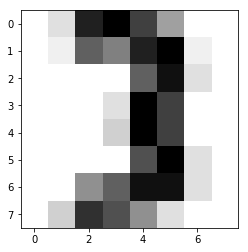

In [186]:
print(y_train[332])
plt.imshow(X_train[332].reshape(8,8), cmap='gray')


Convert labels to vectors

In [187]:
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

In [188]:
nn = SimpleClassifier([64, 32, 16, 10])
nn.fit(X_train, y_train, 1000, 10)

  0%|          | 2/1000 [00:00<01:15, 13.14it/s]

Epoch: 1, Loss: 646.5653306073907


  1%|          | 12/1000 [00:00<01:12, 13.60it/s]

Epoch: 10, Loss: 318.8707587584522


  2%|▏         | 22/1000 [00:01<01:11, 13.66it/s]

Epoch: 20, Loss: 73.38366878368926


  3%|▎         | 32/1000 [00:02<01:11, 13.62it/s]

Epoch: 30, Loss: 41.20019620997971


  4%|▍         | 42/1000 [00:03<01:09, 13.78it/s]

Epoch: 40, Loss: 28.356382163014977


  5%|▌         | 52/1000 [00:03<01:08, 13.86it/s]

Epoch: 50, Loss: 21.009206321263328


  6%|▌         | 62/1000 [00:04<01:07, 13.81it/s]

Epoch: 60, Loss: 16.325258029504248


  7%|▋         | 72/1000 [00:05<01:08, 13.60it/s]

Epoch: 70, Loss: 12.70146804381293


  8%|▊         | 82/1000 [00:05<01:07, 13.63it/s]

Epoch: 80, Loss: 9.518091402419959


  9%|▉         | 92/1000 [00:06<01:07, 13.42it/s]

Epoch: 90, Loss: 7.22699231461881


 10%|█         | 102/1000 [00:07<01:06, 13.44it/s]

Epoch: 100, Loss: 5.672863783636842


 11%|█         | 112/1000 [00:08<01:05, 13.63it/s]

Epoch: 110, Loss: 4.369011369474668


 12%|█▏        | 122/1000 [00:08<01:04, 13.61it/s]

Epoch: 120, Loss: 3.462159729613037


 13%|█▎        | 132/1000 [00:09<01:03, 13.63it/s]

Epoch: 130, Loss: 2.797512825723845


 14%|█▍        | 142/1000 [00:10<01:06, 12.90it/s]

Epoch: 140, Loss: 2.3094555109637827


 15%|█▌        | 152/1000 [00:11<01:06, 12.66it/s]

Epoch: 150, Loss: 1.960759567676238


 16%|█▌        | 162/1000 [00:11<01:01, 13.56it/s]

Epoch: 160, Loss: 1.7006578319170989


 17%|█▋        | 172/1000 [00:12<01:06, 12.36it/s]

Epoch: 170, Loss: 1.4992494810729935


 18%|█▊        | 182/1000 [00:13<01:01, 13.24it/s]

Epoch: 180, Loss: 1.3388886618965896


 19%|█▉        | 192/1000 [00:14<00:59, 13.55it/s]

Epoch: 190, Loss: 1.208355303246365


 20%|██        | 202/1000 [00:14<00:58, 13.59it/s]

Epoch: 200, Loss: 1.1001459177142097


 21%|██        | 212/1000 [00:15<00:57, 13.60it/s]

Epoch: 210, Loss: 1.0090557765452282


 22%|██▏       | 222/1000 [00:16<00:56, 13.85it/s]

Epoch: 220, Loss: 0.9313671382165567


 23%|██▎       | 232/1000 [00:17<00:55, 13.90it/s]

Epoch: 230, Loss: 0.8643576361224548


 24%|██▍       | 242/1000 [00:17<00:54, 13.95it/s]

Epoch: 240, Loss: 0.8059904172435537


 25%|██▌       | 252/1000 [00:18<00:53, 13.95it/s]

Epoch: 250, Loss: 0.7547124937383295


 26%|██▌       | 262/1000 [00:19<00:54, 13.62it/s]

Epoch: 260, Loss: 0.7093198884572655


 27%|██▋       | 272/1000 [00:20<00:52, 13.77it/s]

Epoch: 270, Loss: 0.6688652600436186


 28%|██▊       | 282/1000 [00:20<00:52, 13.69it/s]

Epoch: 280, Loss: 0.6325932571997214


 29%|██▉       | 292/1000 [00:21<00:51, 13.84it/s]

Epoch: 290, Loss: 0.5998943990742482


 30%|███       | 302/1000 [00:22<00:50, 13.94it/s]

Epoch: 300, Loss: 0.5702715952868533


 31%|███       | 312/1000 [00:22<00:49, 13.81it/s]

Epoch: 310, Loss: 0.5433154550457703


 32%|███▏      | 322/1000 [00:23<00:49, 13.82it/s]

Epoch: 320, Loss: 0.5186858146432387


 33%|███▎      | 332/1000 [00:24<00:48, 13.66it/s]

Epoch: 330, Loss: 0.4960977347253627


 34%|███▍      | 342/1000 [00:25<00:48, 13.51it/s]

Epoch: 340, Loss: 0.4753107574004098


 35%|███▌      | 352/1000 [00:25<00:50, 12.94it/s]

Epoch: 350, Loss: 0.4561205726957428


 36%|███▌      | 362/1000 [00:26<00:47, 13.36it/s]

Epoch: 360, Loss: 0.43835248779811203


 37%|███▋      | 372/1000 [00:27<00:48, 12.97it/s]

Epoch: 370, Loss: 0.4218562606375832


 38%|███▊      | 382/1000 [00:28<00:46, 13.39it/s]

Epoch: 380, Loss: 0.40650197693849194


 39%|███▉      | 392/1000 [00:28<00:44, 13.75it/s]

Epoch: 390, Loss: 0.39217673317519197


 40%|████      | 402/1000 [00:29<00:45, 13.04it/s]

Epoch: 400, Loss: 0.37878194765332035


 41%|████      | 412/1000 [00:30<00:43, 13.51it/s]

Epoch: 410, Loss: 0.3662311653356589


 42%|████▏     | 422/1000 [00:31<00:45, 12.74it/s]

Epoch: 420, Loss: 0.354448253880278


 43%|████▎     | 432/1000 [00:31<00:42, 13.32it/s]

Epoch: 430, Loss: 0.343365911969198


 44%|████▍     | 442/1000 [00:32<00:40, 13.62it/s]

Epoch: 440, Loss: 0.33292442867732724


 45%|████▌     | 452/1000 [00:33<00:40, 13.49it/s]

Epoch: 450, Loss: 0.3230706459765733


 46%|████▌     | 462/1000 [00:34<00:43, 12.49it/s]

Epoch: 460, Loss: 0.31375708663331014


 47%|████▋     | 472/1000 [00:34<00:42, 12.47it/s]

Epoch: 470, Loss: 0.30494121755947773


 48%|████▊     | 482/1000 [00:35<00:41, 12.49it/s]

Epoch: 480, Loss: 0.2965848247117412


 49%|████▉     | 492/1000 [00:36<00:39, 12.99it/s]

Epoch: 490, Loss: 0.28865348033381205


 50%|█████     | 502/1000 [00:37<00:38, 13.04it/s]

Epoch: 500, Loss: 0.2811160870230134


 51%|█████     | 512/1000 [00:38<00:36, 13.20it/s]

Epoch: 510, Loss: 0.27394448601150856


 52%|█████▏    | 522/1000 [00:38<00:37, 12.91it/s]

Epoch: 520, Loss: 0.26711311936247767


 53%|█████▎    | 532/1000 [00:39<00:36, 12.96it/s]

Epoch: 530, Loss: 0.2605987376263338


 54%|█████▍    | 542/1000 [00:40<00:33, 13.58it/s]

Epoch: 540, Loss: 0.2543801459833276


 55%|█████▌    | 552/1000 [00:41<00:32, 13.93it/s]

Epoch: 550, Loss: 0.24843798309464288


 56%|█████▌    | 562/1000 [00:41<00:32, 13.33it/s]

Epoch: 560, Loss: 0.2427545278540281


 57%|█████▋    | 572/1000 [00:42<00:33, 12.81it/s]

Epoch: 570, Loss: 0.23731353002260647


 58%|█████▊    | 582/1000 [00:43<00:32, 13.05it/s]

Epoch: 580, Loss: 0.23210006137692343


 59%|█████▉    | 592/1000 [00:44<00:30, 13.48it/s]

Epoch: 590, Loss: 0.2271003845325249


 60%|██████    | 602/1000 [00:44<00:30, 12.95it/s]

Epoch: 600, Loss: 0.22230183704515288


 61%|██████    | 612/1000 [00:45<00:29, 13.20it/s]

Epoch: 610, Loss: 0.2176927287559173


 62%|██████▏   | 622/1000 [00:46<00:28, 13.42it/s]

Epoch: 620, Loss: 0.21326225065030657


 63%|██████▎   | 632/1000 [00:47<00:27, 13.32it/s]

Epoch: 630, Loss: 0.20900039375420873


 64%|██████▍   | 642/1000 [00:47<00:26, 13.47it/s]

Epoch: 640, Loss: 0.20489787680255606


 65%|██████▌   | 652/1000 [00:48<00:26, 13.04it/s]

Epoch: 650, Loss: 0.20094608159483537


 66%|██████▌   | 662/1000 [00:49<00:25, 13.34it/s]

Epoch: 660, Loss: 0.19713699510251737


 67%|██████▋   | 672/1000 [00:50<00:24, 13.64it/s]

Epoch: 670, Loss: 0.1934631575210562


 68%|██████▊   | 682/1000 [00:50<00:23, 13.60it/s]

Epoch: 680, Loss: 0.1899176155674842


 69%|██████▉   | 692/1000 [00:51<00:22, 13.72it/s]

Epoch: 690, Loss: 0.18649388041691967


 70%|███████   | 702/1000 [00:52<00:21, 13.84it/s]

Epoch: 700, Loss: 0.18318588975010097


 71%|███████   | 712/1000 [00:53<00:21, 13.68it/s]

Epoch: 710, Loss: 0.17998797345154044


 72%|███████▏  | 722/1000 [00:53<00:20, 13.69it/s]

Epoch: 720, Loss: 0.1768948225558422


 73%|███████▎  | 732/1000 [00:54<00:19, 13.73it/s]

Epoch: 730, Loss: 0.17390146108957166


 74%|███████▍  | 742/1000 [00:55<00:18, 13.61it/s]

Epoch: 740, Loss: 0.17100322049910266


 75%|███████▌  | 752/1000 [00:55<00:18, 13.31it/s]

Epoch: 750, Loss: 0.1681957163920877


 76%|███████▌  | 762/1000 [00:56<00:17, 13.48it/s]

Epoch: 760, Loss: 0.16547482735245134


 77%|███████▋  | 772/1000 [00:57<00:16, 13.62it/s]

Epoch: 770, Loss: 0.1628366756167981


 78%|███████▊  | 782/1000 [00:58<00:15, 13.67it/s]

Epoch: 780, Loss: 0.1602776094245922


 79%|███████▉  | 792/1000 [00:58<00:15, 13.62it/s]

Epoch: 790, Loss: 0.15779418687571095


 80%|████████  | 802/1000 [00:59<00:14, 13.67it/s]

Epoch: 800, Loss: 0.1553831611475946


 81%|████████  | 812/1000 [01:00<00:13, 13.68it/s]

Epoch: 810, Loss: 0.15304146694052


 82%|████████▏ | 822/1000 [01:01<00:13, 13.50it/s]

Epoch: 820, Loss: 0.15076620803386265


 83%|████████▎ | 832/1000 [01:01<00:12, 13.48it/s]

Epoch: 830, Loss: 0.14855464584874684


 84%|████████▍ | 842/1000 [01:02<00:11, 13.61it/s]

Epoch: 840, Loss: 0.14640418892361334


 85%|████████▌ | 852/1000 [01:03<00:10, 13.60it/s]

Epoch: 850, Loss: 0.14431238321898643


 86%|████████▌ | 862/1000 [01:04<00:10, 13.60it/s]

Epoch: 860, Loss: 0.1422769031763755


 87%|████████▋ | 872/1000 [01:04<00:09, 13.77it/s]

Epoch: 870, Loss: 0.14029554346391515


 88%|████████▊ | 882/1000 [01:05<00:08, 13.74it/s]

Epoch: 880, Loss: 0.13836621134811591


 89%|████████▉ | 892/1000 [01:06<00:07, 13.77it/s]

Epoch: 890, Loss: 0.13648691963713105


 90%|█████████ | 902/1000 [01:06<00:07, 13.54it/s]

Epoch: 900, Loss: 0.1346557801463295


 91%|█████████ | 912/1000 [01:07<00:06, 13.46it/s]

Epoch: 910, Loss: 0.13287099764171056


 92%|█████████▏| 922/1000 [01:08<00:05, 13.53it/s]

Epoch: 920, Loss: 0.13113086422100056


 93%|█████████▎| 932/1000 [01:09<00:04, 13.60it/s]

Epoch: 930, Loss: 0.12943375409603486


 94%|█████████▍| 942/1000 [01:09<00:04, 13.55it/s]

Epoch: 940, Loss: 0.12777811874347278


 95%|█████████▌| 952/1000 [01:10<00:03, 13.57it/s]

Epoch: 950, Loss: 0.1261624823939403


 96%|█████████▌| 962/1000 [01:11<00:02, 13.67it/s]

Epoch: 960, Loss: 0.12458543783241938


 97%|█████████▋| 972/1000 [01:12<00:02, 13.63it/s]

Epoch: 970, Loss: 0.12304564248517388


 98%|█████████▊| 982/1000 [01:12<00:01, 13.55it/s]

Epoch: 980, Loss: 0.12154181477072536


 99%|█████████▉| 992/1000 [01:13<00:00, 13.77it/s]

Epoch: 990, Loss: 0.12007273069436002


100%|██████████| 1000/1000 [01:14<00:00, 13.81it/s]

Epoch: 1000, Loss: 0.11863722066746814


In [189]:
predictions = nn.predict(X_test)

In [190]:
predictions

array([[5.56837191e-05, 7.34188537e-06, 4.70662832e-06, ...,
        9.92955644e-01, 4.15392811e-05, 6.68562888e-04],
       [9.98326216e-01, 1.08051615e-12, 2.66061556e-03, ...,
        3.34952386e-04, 8.06033115e-05, 6.02470167e-05],
       [1.54197271e-03, 1.47489173e-05, 4.48200179e-04, ...,
        8.55622665e-08, 2.11607054e-03, 3.99771078e-10],
       ...,
       [9.98671638e-01, 4.03086074e-13, 2.07223814e-04, ...,
        1.87149638e-03, 5.62406956e-05, 3.18543156e-04],
       [8.50045497e-10, 9.98979940e-01, 1.96409375e-03, ...,
        2.85945348e-05, 9.47305184e-05, 4.85380435e-07],
       [1.60722456e-03, 3.76579912e-05, 1.83501150e-06, ...,
        1.55099162e-03, 3.37518958e-08, 6.73599814e-07]])

In [209]:
predictions[9].argmax()

0

In [204]:
y_test[9][2]

0

In [213]:
true_counter = 0
false_counter = 0
for i in range(len(y_test)):
    if y_test[i][predictions[i].argmax()] == 1:
        true_counter += 1
    else:
        false_counter += 1
        
print(100 * true_counter / len(y_test))

98.33333333333333


# MNIST Keras

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [286]:
dataset = datasets.fetch_mldata('MNIST Original')

/home/yurii/Work/study/tf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/yurii/Work/study/tf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Normalize the data

In [287]:
data = dataset.data.astype('float') / 255

Split training / test data

In [288]:
X_train, x_test, y_train, y_test = train_test_split(data, dataset.target, test_size=0.2)

show image & label

7.0

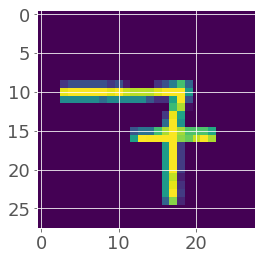

In [289]:

plt.imshow(X_train[0].reshape(np.sqrt(X_train[0].shape[0]).astype('int'),np.sqrt(X_train[0].shape[0]).astype('int')))
y_train[0]


In [290]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [291]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Build the model

    784 -> 256 -> 128 ->  10

In [292]:
model = Sequential()
# First fully-connected layer
model.add(Dense(256, input_shape=X_train[-1].shape, activation='relu'))
# Second fully-connected layer
model.add(Dense(128, activation='relu'))
# Output layer. Use softmax activation to get normalized probabilities of obtaining to the one of the classes
model.add(Dense(10, activation='softmax'))

In [293]:
learning_rate = 0.01
epochs = 100
stoch_grad_desc = SGD(learning_rate)


In [294]:
model.compile(loss='categorical_crossentropy', optimizer=stoch_grad_desc, metrics=['accuracy'])

   ### Training

In [295]:
H = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=epochs, batch_size=128)

Train on 56000 samples, validate on 56000 samples
Epoch 1/100
56000/56000 [==============================] - 2s 27us/step - loss: 1.2927 - acc: 0.6718 - val_loss: 0.6263 - val_acc: 0.8536
Epoch 2/100
56000/56000 [==============================] - 1s 21us/step - loss: 0.4976 - acc: 0.8725 - val_loss: 0.4192 - val_acc: 0.8874
Epoch 3/100
56000/56000 [==============================] - 1s 21us/step - loss: 0.3860 - acc: 0.8933 - val_loss: 0.3576 - val_acc: 0.9000
Epoch 4/100
56000/56000 [==============================] - 1s 21us/step - loss: 0.3408 - acc: 0.9033 - val_loss: 0.3240 - val_acc: 0.9072
Epoch 5/100
56000/56000 [==============================] - 1s 21us/step - loss: 0.3130 - acc: 0.9104 - val_loss: 0.3014 - val_acc: 0.9141
Epoch 6/100
56000/56000 [==============================] - 1s 26us/step - loss: 0.2922 - acc: 0.9161 - val_loss: 0.2827 - val_acc: 0.9187
Epoch 7/100
56000/56000 [==============================] - 1s 21us/step - loss: 0.2755 - acc: 0.9205 - val_loss: 0.2665 - 

56000/56000 [==============================] - 1s 20us/step - loss: 0.0670 - acc: 0.9816 - val_loss: 0.0650 - val_acc: 0.9825
Epoch 60/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.0657 - acc: 0.9820 - val_loss: 0.0637 - val_acc: 0.9829
Epoch 61/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.0646 - acc: 0.9821 - val_loss: 0.0630 - val_acc: 0.9828
Epoch 62/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.0633 - acc: 0.9824 - val_loss: 0.0616 - val_acc: 0.9833
Epoch 63/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.0624 - acc: 0.9826 - val_loss: 0.0611 - val_acc: 0.9834
Epoch 64/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.0612 - acc: 0.9836 - val_loss: 0.0599 - val_acc: 0.9838
Epoch 65/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.0603 - acc: 0.9834 - val_loss: 0.0584 - val_acc: 0.9841
Epoch 66/100
56000/56000 [==============

In [296]:
predicted = model.predict(x_test, batch_size=128)

In [297]:
print(classification_report(y_test.argmax(axis=1), predicted.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1414
           1       0.98      0.99      0.99      1591
           2       0.98      0.98      0.98      1362
           3       0.98      0.96      0.97      1401
           4       0.98      0.97      0.97      1351
           5       0.97      0.98      0.97      1217
           6       0.98      0.98      0.98      1455
           7       0.98      0.98      0.98      1449
           8       0.98      0.97      0.97      1358
           9       0.97      0.97      0.97      1402

   micro avg       0.98      0.98      0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



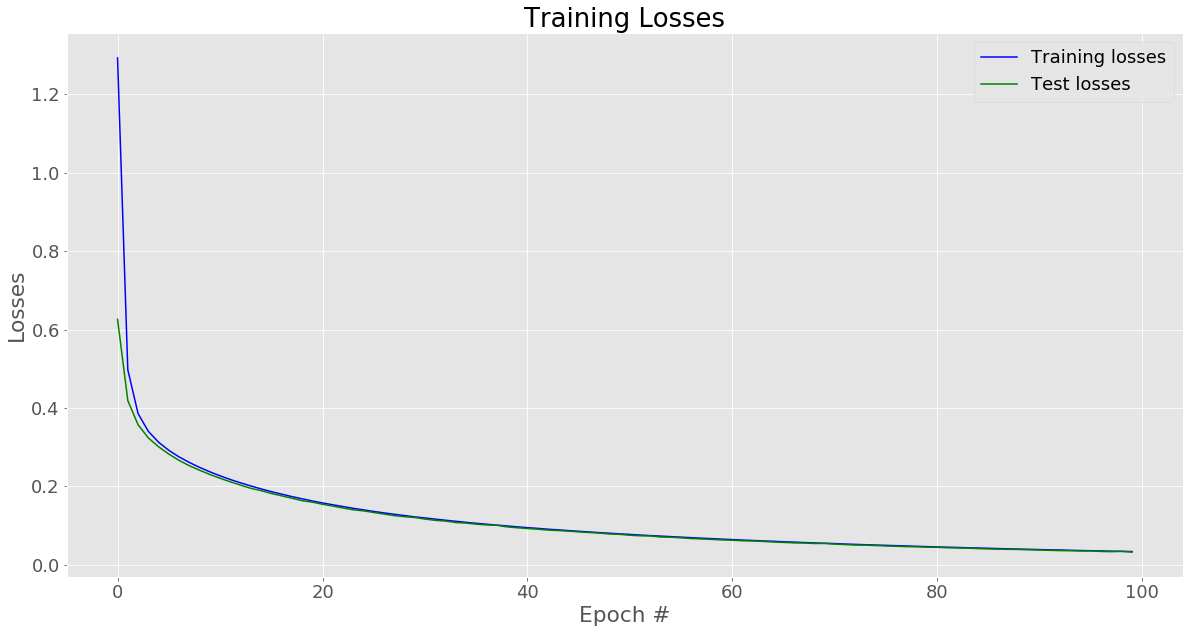

In [298]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10))

plt.rcParams.update({'font.size': 18})

plt.plot(np.arange(0, epochs), H.history["loss"], label="Training losses", c="b")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="Test losses", c='g')

plt.title("Training Losses")
plt.xlabel("Epoch #")
plt.ylabel("Losses")
plt.legend()
plt.show()

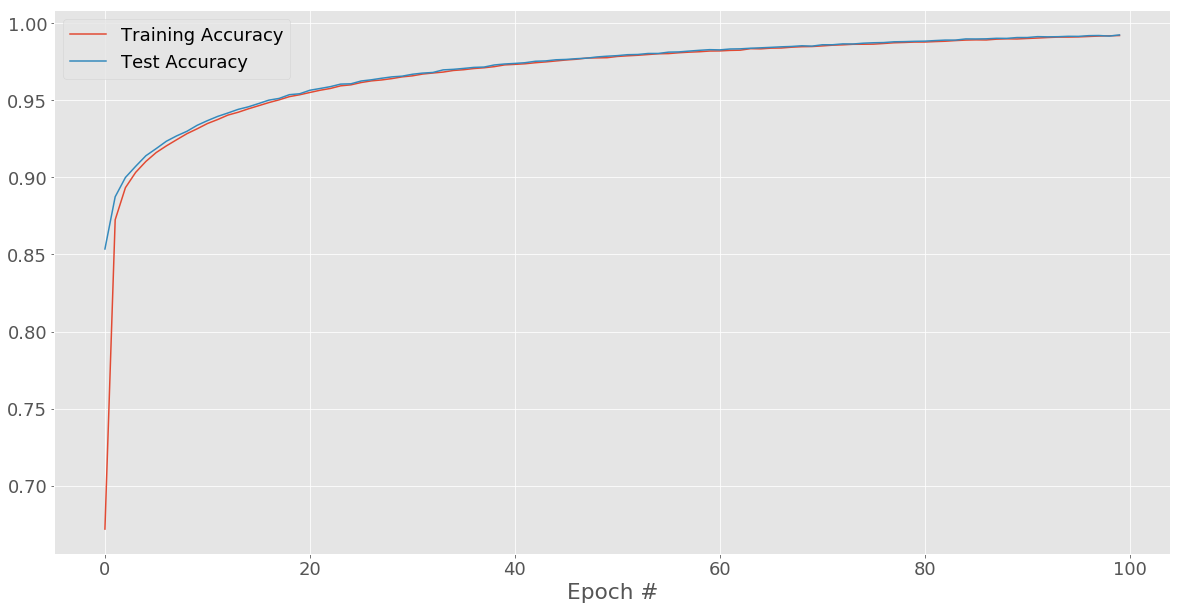

In [299]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, epochs), H.history["acc"], label="Training Accuracy")
plt.plot(np.arange(0, epochs), H.history["val_acc"], label="Test Accuracy")
plt.legend()
plt.xlabel("Epoch #")
plt.show()

# CIFAR - 10

In [5]:
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Normalize data
X_train = X_train.astype("float") / 255
X_test = X_test.astype("float") / 255
# 
X_train = X_train.reshape((X_train.shape[0], 3072))
X_test = X_test.reshape((X_test.shape[0], 3072))

In [9]:
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

            Build the model of shape: 3072 ---> 1024 ---> 512 ---> 10

In [10]:
model = Sequential()
# add first fully-connected layer
model.add(Dense(1024, input_shape=X_train[3].shape, activation="relu"))
# add second fully-connected hidden layer
model.add(Dense(512, activation="relu"))
# add output layer
model.add(Dense(10, activation="softmax"))

In [13]:
learning_rate = 0.01
epochs = 100
batch_size = 32
grad_desc = SGD(learning_rate)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=grad_desc, metrics=['accuracy'])

            DO! THE! TRAINING!!!!!!!!!!!!!!!!!!!!!

In [16]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.8284 - acc: 0.3472 - val_loss: 1.7000 - val_acc: 0.3984
Epoch 2/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.6436 - acc: 0.4183 - val_loss: 1.5876 - val_acc: 0.4518
Epoch 3/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.5624 - acc: 0.4472 - val_loss: 1.5564 - val_acc: 0.4551
Epoch 4/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.5063 - acc: 0.4688 - val_loss: 1.5236 - val_acc: 0.4514
Epoch 5/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.4589 - acc: 0.4841 - val_loss: 1.4514 - val_acc: 0.4875
Epoch 6/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.4198 - acc: 0.4989 - val_loss: 1.5041 - val_acc: 0.4715
Epoch 7/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.3820 - acc: 0.5127 - val_loss: 1.

50000/50000 [==============================] - 5s 106us/step - loss: 0.3179 - acc: 0.8983 - val_loss: 1.6566 - val_acc: 0.5532
Epoch 60/100
50000/50000 [==============================] - 5s 105us/step - loss: 0.3027 - acc: 0.9032 - val_loss: 1.8165 - val_acc: 0.5339
Epoch 61/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.2908 - acc: 0.9073 - val_loss: 1.7230 - val_acc: 0.5533
Epoch 62/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.2744 - acc: 0.9154 - val_loss: 1.7494 - val_acc: 0.5431
Epoch 63/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.2613 - acc: 0.9207 - val_loss: 1.7098 - val_acc: 0.5588
Epoch 64/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.2491 - acc: 0.9241 - val_loss: 1.9110 - val_acc: 0.5305
Epoch 65/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.2385 - acc: 0.9284 - val_loss: 1.8597 - val_acc: 0.5424
Epoch 66/100
50000/50000 [=======

In [17]:
y_pred = model.predict(X_test, batch_size=batch_size)

In [18]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.64      0.68      0.66      1000
  automobile       0.67      0.65      0.66      1000
        bird       0.51      0.41      0.46      1000
         cat       0.39      0.42      0.41      1000
        deer       0.51      0.50      0.50      1000
         dog       0.45      0.49      0.47      1000
        frog       0.59      0.67      0.62      1000
       horse       0.63      0.62      0.63      1000
        ship       0.73      0.64      0.68      1000
       truck       0.60      0.59      0.59      1000

   micro avg       0.57      0.57      0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



In [20]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10))

plt.rcParams.update({'font.size': 18})

plt.plot(np.arange(0, epochs), model.history["loss"], label="Training losses", c="b")
plt.plot(np.arange(0, epochs), model.history["val_loss"], label="Test losses", c='g')

plt.title("Training Losses")
plt.xlabel("Epoch #")
plt.ylabel("Losses")
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

<Figure size 1440x720 with 0 Axes>

In [21]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, epochs), H.history["acc"], label="Training Accuracy")
plt.plot(np.arange(0, epochs), H.history["val_acc"], label="Test Accuracy")
plt.legend()
plt.xlabel("Epoch #")
plt.show()

NameError: name 'H' is not defined

<Figure size 1440x720 with 0 Axes>